In [0]:
#Importing required libraries
from sklearn.datasets import load_digits
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import numpy.random as rnd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from numpy import random
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#Load MNIST dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

Image with darkening effect


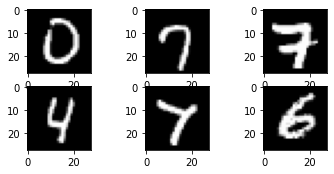

In [64]:
# Reshaping the data in terms of height, width and channels
xTrain = xTrain.reshape((xTrain.shape[0],28,28,1))
xTest = xTest.reshape((xTest.shape[0],28,28,1))

#Converting datatype from int to float
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')
# Defining data preparation
data_aug = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# Fitting data in model
data_aug.fit(xTrain)
print("Image with darkening effect")
# configure batch size of images to display a Pyplot
for xT in data_aug.flow(xTrain, batch_size=6):
	for n in range(0, 6):
		plt.subplot(330 + 1 + n)
		plt.imshow(xT[n].reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.show()
	break

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Image with Highlighted border


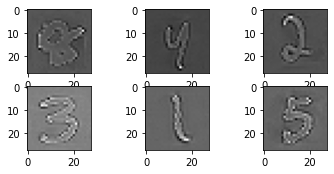

In [65]:
# Defining data preparation
data_aug = ImageDataGenerator(zca_whitening=True)

# Fitting data in model
data_aug.fit(xTrain)
print("Image with Highlighted border")
# configure batch size of images tp dissplay a Pyplot
for xT in data_aug.flow(xTrain, batch_size=6):
	for n in range(0, 6):
		plt.subplot(330 + 1 + n)
		plt.imshow(xT[n].reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.show()
	break

In [0]:
#Reshaping and normalizing the input
img, lbl = (xTrain[0:1000].reshape(1000,28*28)/255 , yTrain[0:1000])


In [0]:
#Converting the lables to vector
oneHotLables = np.zeros((len(lbl),10))
for i,l in enumerate(lbl):
  oneHotLables[i][l] = 1
lbl = oneHotLables

In [0]:
# Reshaping and normalizing test images and lables
test_img = xTest.reshape(len(xTest),28*28)/255
test_lbl = np.zeros((len(yTest),10))
for i,l in enumerate(yTest):
  test_lbl[i][l] = 1

In [0]:
# Activation functions to be used in hidden layers
def relu(x):
    return np.maximum(x, 0)
    
def relu_deriv(x):
    return relu(x) * (1 - relu(x))

In [0]:
# Define Softmax function to be used in outermost layer of neural network
def softmax(u):
    return np.exp(u) / np.sum(np.exp(u), axis=0, keepdims=True)

In [0]:
# Defining Leraning Rate(alpha), number of iterations, number of neurons in hidden layers
alpha, iteration ,hiddensize= (2,400,100)
pixel, total_lbls = (784,10)
batch_size =64

#Initializing weights
weight_0_1 = 0.02 * np.random.random((pixel,hiddensize)) - 0.01
weight_1_2 = 0.2 * np.random.random((hiddensize,total_lbls)) - 0.1

for j in range(iteration):
  #Training Neural Network
  count = 0
  for i in range(int(len(img) / batch_size)):
    batch_start,batch_end=((i*batch_size),((i+1) * batch_size))  #start and end of mini batches
    l0 = img[batch_start:batch_end]
    l1 = relu(np.dot(l0,weight_0_1)) #using activation function Relu on output from first layer and passing it as input to second layer
    dropout_mask = np.random.randint(2,size =l1.shape)  
    l1 *= dropout_mask * 2           #Dropout
    l2 = softmax(np.dot(l1,weight_1_2))

    for n in range(batch_size):
      count += int(np.argmax(l2[n:n+1])== np.argmax(lbl[batch_start + n:batch_start + n+ 1]))
      l2_delta = (lbl[batch_start:batch_end]-l2)/(batch_size *l2.shape[0])
      l1_delta = l2_delta.dot(weight_1_2.T)*relu_deriv(l1)
      l1_delta *= dropout_mask
    
      weight_1_2 +=alpha * l1.T.dot(l2_delta)         #Updating weights
      weight_0_1 +=alpha * l0.T.dot(l1_delta)

    # Testing Neural network
    test_count = 0    
    for i in range(len(test_img)):
      l0 = test_img[i:i+1]
      l1 = relu(np.dot(l0,weight_0_1))
      l2 = softmax(np.dot(l1,weight_1_2))
      test_count += int(np.argmax(l2)==np.argmax(test_lbl[i:i+1]))

    if (j % 100 == 0):
      print("I: {}  Learning Rate:{} Test Accuracy:{} Train Accuracy:{}".format(str(j), alpha, str((test_count/float(len(test_img)))*100), str((count/float(len(img)))*100)))


#Confusion Matrix
l0_pred = test_img
l1_pred = relu(np.dot(l0_pred,weight_0_1))
l2_pred = softmax(np.dot(l1_pred,weight_1_2))
conf_mat = confusion_matrix(test_lbl,l2_pred)
print("Confusion Matrix:{}".format(conf_mat))

#Visualization of output
plt.imshow(l2_pred.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()




I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:0.8
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:2.3
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:3.1
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:4.3
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:5.5
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:6.6000000000000005
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:8.1
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:9.4
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:10.9
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:11.899999999999999
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:13.0
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:14.099999999999998
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:15.4
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:16.5
I: 0  Learning Rate:2 Test Accuracy:9.8 Train Accuracy:18.8
